In [4]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request

In [5]:
url='https://www.numbeo.com/crime/rankings.jsp?title=2021'

In [6]:
tables=pd.read_html('https://en.wikipedia.org/wiki/List_of_urban_areas_in_the_United_Kingdom#cite_note-6')

In [7]:
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

In [8]:
all_tables=soup.find_all("table", id="td")

right_table=soup.find_all("table")
actual_table=soup.find_all("tbody")
actual_table[0]

<tbody>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Caracas, Venezuela</td>
<td style="text-align: right">84.68</td>
<td style="text-align: right">15.32</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Port Moresby, Papua New Guinea</td>
<td style="text-align: right">82.04</td>
<td style="text-align: right">17.96</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Pretoria, South Africa</td>
<td style="text-align: right">81.94</td>
<td style="text-align: right">18.06</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Durban, South Africa</td>
<td style="text-align: right">80.84</td>
<td style="text-align: right">19.16</td>
</tr>
<tr style="width: 100%">
<td></td>
<td class="cityOrCountryInIndicesTable">Johannesburg, South Africa</td>
<td style="text-align: right">80.65</td>
<td style="text-align: right">19.35</td>
</tr>
<tr style="width: 100%">
<td></

In [9]:
table=soup.find('tbody')
headings=table.findAll('thead')
headings_list=[i.text for i in headings]
headings_list

[]

In [10]:
values=table.findAll('td')

In [11]:
Rank=[]
City=[]
Crime_index=[]
Safety_index=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        Rank.append(cells[0].find(text=True))
        City.append(cells[1].find(text=True))
        Crime_index.append(cells[2].find(text=True))
        Safety_index.append(cells[3].find(text=True))

In [12]:
df=pd.DataFrame(Rank,columns=['Rank'])
df['City']=City
df['Crime_index']=Crime_index
df['Safety_index']=Safety_index
df['Rank'] = df.index + 1
df[['City', 'Country']] = df['City'].str.split(',', 1, expand=True)
df = df[['Rank', 'City', 'Country', 'Crime_index', 'Safety_index']]

In [13]:
crime_safety_index = df


In [14]:
#Pushing straight to github repository
crime_safety_index.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\crime_safety_index.csv')

In [124]:
url2 = 'https://www.numbeo.com/health-care/rankings.jsp?title=2021'
tables=pd.read_html('https://www.numbeo.com/health-care/rankings.jsp?title=2021')
page2 = urllib.request.urlopen(url2)
soup2 = BeautifulSoup(page2, "lxml")

all_tables=soup.find_all("table", id="td")

right_table=soup2.find_all("table")
actual_table=soup2.find_all("tbody")
actual_table[0]

table=soup2.find('tbody')
headings=table.findAll('thead')
headings_list=[i.text for i in headings]
headings_list

values=table.findAll('td')

Rank=[]
City=[]
health_care_index=[]
health_care_exp_index=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        Rank.append(cells[0].find(text=True))
        City.append(cells[1].find(text=True))
        health_care_index.append(cells[2].find(text=True))
        health_care_exp_index.append(cells[3].find(text=True))

df=pd.DataFrame(Rank,columns=['Rank'])
df['City']=City
df['health_care_index']=health_care_index
df['health_care_exp_index']=health_care_exp_index
df['Rank'] = df.index + 1
df[['City', 'Country']] = df['City'].str.split(',', 1, expand=True)
df = df[['Rank', 'City', 'Country', 'health_care_index', 'health_care_exp_index']]

health_care_index = df
health_care_index

health_care_index.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\health_care_index.csv')

In [122]:
url3 = 'https://www.numbeo.com/pollution/rankings_current.jsp'
tables=pd.read_html('https://www.numbeo.com/pollution/rankings_current.jsp')
page3 = urllib.request.urlopen(url3)
soup3 = BeautifulSoup(page3, "lxml")

all_tables=soup.find_all("table", id="td")

right_table=soup3.find_all("table")
actual_table=soup3.find_all("tbody")
actual_table[0]

table=soup2.find('tbody')
headings=table.findAll('thead')
headings_list=[i.text for i in headings]
headings_list

values=table.findAll('td')

Rank=[]
City=[]
pollution_index=[]
pollution_exp_index=[]

for row in actual_table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        Rank.append(cells[0].find(text=True))
        City.append(cells[1].find(text=True))
        pollution_index.append(cells[2].find(text=True))
        pollution_exp_index.append(cells[3].find(text=True))

df=pd.DataFrame(Rank,columns=['Rank'])
df['City']=City
df['pollution_index']=pollution_index
df['pollution_exp_index']=pollution_exp_index
df['Rank'] = df.index + 1
df[['City', 'Country']] = df['City'].str.split(',', 1, expand=True)
df = df[['Rank', 'City', 'Country', 'pollution_index', 'pollution_exp_index']]

pollution_index = df
pollution_index

pollution_index.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\pollution_index.csv')

0       North Macedonia
1                 Nepal
2                 India
3                 Ghana
4              Mongolia
             ...       
348         New Zealand
349             Finland
350           Australia
351              Sweden
352              Norway
Name: Country, Length: 353, dtype: object


In [120]:
merge_health_crime = pd.merge(health_care_index, crime_safety_index, left_on=['City', 'Country'], right_on=['City', 'Country'], how='outer')
merge_health_crime_pollution = pd.merge(merge_health_crime, pollution_index, left_on=['City', 'Country'], right_on=['City', 'Country'], how='outer')

In [137]:
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('NV, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('CO, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('NY, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('CA, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('WT, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('TX, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('VA, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('NE, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('Newfoundland and Labrador, Canada','Canada')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('KY, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('FL, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('AB, Canada','Canada')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('BC, Canada','Canada')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('TN, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('AZ, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('AK, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('MI, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('WA, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('IL, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('NM, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('GA, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('PA, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('DC, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('UT, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('IN, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('OR, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('NC, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('MD, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('MO, United States','United States')
merge_health_crime_pollution['Country']=merge_health_crime_pollution['Country'].str.replace('Shandong, China','China')

In [138]:
merge_health_crime_pollution

,Rank_x,City,Country,health_care_index,health_care_exp_index,Rank_y,Crime_index,Safety_index,Rank,pollution_index,pollution_exp_index
0,1.0,Taipei,Taiwan,87.33,160.90,429.0,13.45,86.55,218.0,49.88,84.31
1,2.0,Kaohsiung,Taiwan,86.78,159.90,NaN,NaN,NaN,57.0,78.65,143.70
2,3.0,Gold Coast,Australia,86.04,158.79,218.0,42.72,57.28,318.0,25.68,42.93
3,4.0,Liverpool,United Kingdom,85.71,158.51,201.0,44.35,55.65,NaN,NaN,NaN
4,5.0,Chiang Mai,Thailand,84.84,155.70,394.0,23.98,76.02,66.0,77.08,140.24
...,...,...,...,...,...,...,...,...,...,...,...
488,NaN,Bhubaneswar,India,NaN,NaN,NaN,NaN,NaN,220.0,49.20,82.60
489,NaN,Shimla,India,NaN,NaN,NaN,NaN,NaN,221.0,48.98,83.58
490,NaN,Goa,India,NaN,NaN,NaN,NaN,NaN,225.0,48.47,88.09
491,NaN,Reno,United States,NaN,NaN,NaN,NaN,NaN,289.0,32.67,53.24


In [113]:
if merge_health_crime_pollution['Country'].str.contains(','):
    merge_health_crime_pollution['Country'] = merge_health_crime_pollution['Country'].str.lstrip(',')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [116]:
merge_health_crime_pollution['Country'].str.contains(', ')

0       None
1       None
2       None
3       None
4       None
       ...  
488     None
489     None
490     None
491    False
492    False
Name: Country, Length: 493, dtype: object

In [35]:
#https://simplemaps.com/data/world-cities source of population dataset

In [36]:
pop_data = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_3_satisfaction\worldcities_population_data.csv')

In [139]:
merge_health_crime_pollution_pop = pd.merge(merge_health_crime_pollution, pop_data, left_on=['City'], right_on=['city'])

In [140]:
merge_health_crime_pollution_pop
merge_health_crime_pollution_pop.to_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_3_satisfaction\merge_health_crime_pollution_pop.csv')



TypeError: 'value' must be an instance of str or bytes, not a float

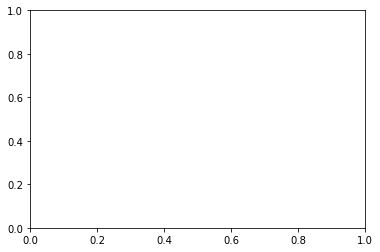

In [39]:
filtered = merge_health_crime_pollution_pop[merge_health_crime_pollution_pop['population'] > 1000000]
x = filtered['population']
y = filtered['pollution_index']

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
plt.show()


In [40]:
#https://ghsl.jrc.ec.europa.eu/ucdb2018visual.php
#https://ghsl.jrc.ec.europa.eu/index.php


eu_density_data = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\eu_density_data.csv')
eu_density_data

C:\Users\vw191\Downloads\annaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20,21,22,23,28,31,32,33,34,55,56,57,58,159) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID_HDC_G0,QA2_1V,AREA,BBX_LATMN,BBX_LONMN,BBX_LATMX,BBX_LONMX,GCPNT_LAT,GCPNT_LON,CTR_MN_NM,...,EX_EQ19MMI,EX_EQ19_Q,EX_HW_IDX,SDG_LUE9015,SDG_A2G14,SDG_OS15MX,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163
0,1,1,185,21.247683,-158.043016,21.422193,-157.730529,21.340678,-157.893497,United States,...,NaN,missing,NaN,0.074385,0.226415,56.41,NaN,NaN,NaN,NaN
1,2,2,42,-17.641184,-149.628088,-17.517631,-149.508018,-17.534103,-149.568053,French Polynesia,...,NaN,missing,NaN,0.128,0.284119,NaN,NaN,NaN,NaN,NaN
2,3,1,55,34.858517,-120.475511,34.989334,-120.389183,34.923123,-120.434372,United States,...,0.0,available,2.79174,0.48114,0.040129,23.64,NaN,NaN,NaN,NaN
3,4,1,48,36.582997,-121.952215,36.635743,-121.811816,36.607720,-121.882378,United States,...,0.0,available,NaN,0.44484,0.138683,42.17,NaN,NaN,NaN,NaN
4,5,1,60,34.388220,-119.853855,34.457831,-119.658413,34.427664,-119.743693,United States,...,0.0,available,4.25502,0.55676,0.061348,36.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130,13131,1,70,-37.737746,176.104748,-37.631690,176.321892,-37.684080,176.183663,New Zealand,...,6.0,available,14.05370,0.23856,0.409358,54.71,NaN,NaN,NaN,NaN
13131,13132,0,3,-6.759222,155.679978,-6.743003,155.703239,-6.749761,155.693009,Papua New Guinea,...,8.0,available,1.81968,4.1398,1.000000,NaN,NaN,NaN,NaN,NaN
13132,13133,1,23,-9.454775,159.911539,-9.422255,160.006750,-9.436571,159.963101,Solomon Islands,...,8.0,available,1.90593,1.7473,0.824672,82.3,NaN,NaN,NaN,NaN
13133,13134,1,27,-22.304278,166.418428,-22.245962,166.483047,-22.277587,166.452136,New Caledonia,...,4.0,available,NaN,0.25381,0.080976,55.15,NaN,NaN,NaN,NaN


In [41]:
eu_density_data = eu_density_data[['UC_NM_MN' ,'XC_NM_LST' ,'XCTR_NBR', 'AREA', 'P15']]

In [42]:
eu_density_data.columns = ['City', 'Country', 'boundary_code', 'area_km2', 'population_2015']
eu_density_data = eu_density_data[eu_density_data['boundary_code'] == 1]

eu_density_data.to_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_3_satisfaction\eu_density_data.csv')

In [45]:
eu_density_data['Country'] = eu_density_data['Country'].astype(str)
eu_density_data['City'] = eu_density_data['City'].astype(str) 

merge_health_crime_pollution_pop['Country'] = merge_health_crime_pollution_pop['Country'].astype(str)
merge_health_crime_pollution_pop['City'] = merge_health_crime_pollution_pop['City'].astype(str) 

0                None
1                None
2                None
3                None
4                None
            ...      
799              None
800              None
801              None
802     United States
803     United States
Name: Country, Length: 804, dtype: object

In [44]:
merge_health_crime_pollution_pop_eu = pd.merge(merge_health_crime_pollution_pop, eu_density_data, left_on=['City', 'Country'], right_on=['City', 'Country'])
merge_health_crime_pollution_pop_eu

,Rank_x,City,Country,health_care_index,health_care_exp_index,Rank_y,Crime_index,Safety_index,Rank,pollution_index,...,country,iso2,iso3,admin_name,capital,population,id,boundary_code,area_km2,population_2015
